In [52]:
# House Price Prediction using Linear Regression with Multiple Features

# Hypothesis Function
# htheta(x)=theta0*X0 + theta1*X1 + theta2*X2 + .... + thetan*Xn 
# htheta(x)=Summation(thetai * Xi) for i=0 to n
# where X1, X2, X3, .... Xn are the features and X0 = 1 always
# theta0, theta1, theta2, .... thetan are the parameters or weights 
# htheta(x) is the predicted value of y
# y is the actual value of y

# Loss Function
# J(theta) = (1/2m) * summation(predicted - actual)^2 
# J(theta) = (1/2m) * summation(htheta(x) - y)^2

# Gradient Descent or Optimization Algorithm to minimize the loss function
# theta(j) = theta(j) - alpha * (1/m) * summation(htheta(x) - y) * x(j)


In [53]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [54]:
# Step-1  Generate the data
X, y = make_regression(n_samples=500, n_features=10,n_informative=5, noise=5, random_state=0)
print(X.shape, y.shape)
n_features = X.shape[1]

(500, 10) (500,)


In [55]:
pd.DataFrame(X).head(n=10)

,0,1,2,3,4,5,6,7,8,9
0,1.706468,1.511639,-0.000417,0.374155,0.073285,0.701783,0.409552,-0.461894,-0.626490,-0.799593
1,-1.616956,0.640132,-0.369182,-0.239379,-0.738031,-0.024326,1.099660,0.279925,-0.098150,0.655264
2,0.093953,-0.130107,0.929505,0.582225,-2.739677,0.943046,-2.094603,-0.569312,0.269904,0.123722
3,-1.542758,-0.789954,0.537035,-0.286835,-2.369623,-0.767332,1.634406,-0.260560,0.128957,0.571227
4,-0.101003,-2.231538,0.436187,1.571463,1.324868,-0.587375,1.077315,0.840648,0.261106,0.811090
5,0.802456,-0.268003,1.867559,0.906045,-0.155010,0.947252,-0.861226,0.614079,0.922207,1.910065
6,-0.171546,0.523277,-1.292857,0.267051,0.823504,0.771791,-0.039283,2.163236,1.336528,-1.168093
7,0.096004,-0.148766,1.587762,-0.643258,0.079122,-0.045113,-1.133593,0.850531,-0.839124,0.996760
8,0.883397,-0.715865,-0.772599,-0.283625,-0.076339,-1.300440,-2.327604,1.430557,-1.323409,-2.445227
9,1.833435,0.141807,-0.971171,1.426317,-0.477286,0.355704,2.488442,0.466380,-0.094393,1.695970


In [56]:
# Setp-2 Normalize the data
def normalize(X):
    # axis = 0 means column wise and axis = 1 means row wise
    u=X.mean(axis=0)
    std=X.std(axis=0)

    return (X-u)/std;


In [57]:
X=normalize(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,1.764831,1.579606,0.093808,0.341546,0.103202,0.745205,0.421736,-0.461091,-0.710885,-0.761760
1,-1.612963,0.709920,-0.277540,-0.301827,-0.693297,-0.045695,1.116862,0.265971,-0.166048,0.714702
2,0.125936,-0.058708,1.030243,0.559735,-2.658385,1.007996,-2.100631,-0.566372,0.213499,0.175267
3,-1.537551,-0.717175,0.635024,-0.351591,-2.295090,-0.855000,1.655498,-0.263762,0.068151,0.629417
4,-0.072209,-2.155744,0.533470,1.597083,1.331926,-0.658985,1.094355,0.815541,0.204426,0.872842


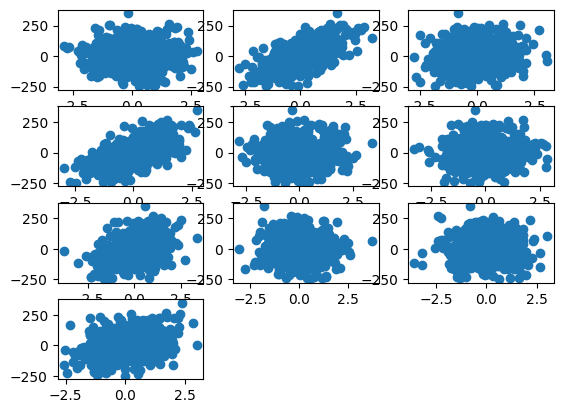

In [58]:
# Visulaize y as function of each feature
for f in range(0,10):
    plt.subplot(4,3,f+1);
    plt.scatter(X[:,f],y);

plt.show()

In [59]:
# Step-4 Train Test Split
# XT -> Training Data, Xt -> Testing Data
# yT -> Training Data, yt -> Testing Data

In [60]:
XT,Xt,yT,yt=train_test_split(X,y,test_size=0.3,shuffle=True,random_state=0)
print(XT.shape, Xt.shape)
print(yT.shape, yt.shape)

(350, 10) (150, 10)
(350,) (150,)


In [61]:
# Step-5 Modelling / Linear Regression with Multiple Features

def preprocess(X):
    # add a column of ones in X for X0
    if(X.shape[1]==n_features):
        m=X.shape[0];
        ones=np.ones((m,1))
        X=np.hstack((ones,X))
    return X

In [62]:
# X -> m x n matrix 
# theta -> n x 1 matrix
# htheta(x) = X * theta
# htheta(x) -> m x 1 matrix
# return m x 1 matrix
# fast/vectorized implementation -> faster than loops 
def hypothesis(X,theta):
    return np.dot(X,theta);

# ypredicted-> m x 1 matrix
# we are avoiding loops here and using numpy vectorized implementation
def loss(X,y,theta):
    ypredicted=hypothesis(X,theta);
    error=np.mean((ypredicted-y)**2);
    return error;

def gradient(X,y,theta):
    ypredicted=hypothesis(X,theta);
    # X.T-> is transpose of X
    grad=np.dot(X.T,(ypredicted-y));
    m=X.shape[0];
    return grad/m;

def train(X,y,learning_rate=0.1,max_iters=100):
    n=X.shape[1];
    theta=np.random.randn(n);

    error_list=[];

    for i in range(max_iters):
        error=loss(X,y,theta);
        error_list.append(error);
        grad=gradient(X,y,theta);
        theta=theta-learning_rate*grad;
    
    plt.plot(error_list);
    return theta;


[-2.03075870e-01  6.10120062e+01  1.02898792e+01  6.33906528e+01
  9.80595940e-03 -2.62359921e-01  4.06190370e+01  1.41531301e-02
  6.53832028e-02  2.50531312e+01]


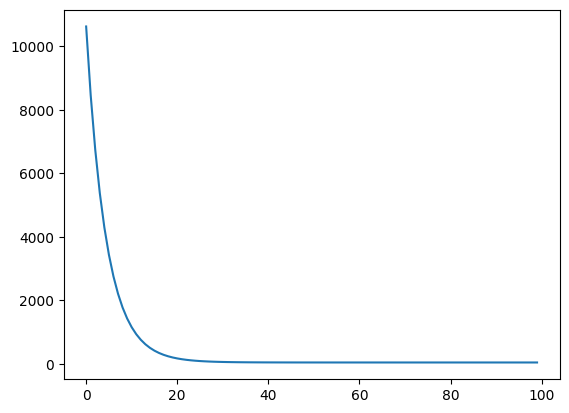

In [63]:
theta=train(XT,yT);
print(theta)

In [67]:
def r2Score(y,ypredicted):
    ymean=y.mean();
    num=np.sum((y-ypredicted)**2);
    denom=np.sum((y-ymean)**2);
    return (1-num/denom)*100;

In [68]:
yp= hypothesis(Xt,theta);

In [69]:
r2Score(yt,yp)

99.5938534590823

In [71]:
# Linear Regression using sklearn
from sklearn.linear_model import LinearRegression

In [72]:
model=LinearRegression();
model.fit(XT,yT);

In [73]:
yp=model.predict(Xt);
yp.shape

(150,)

In [75]:
print(model.score(Xt,yt));

0.9974543064114684


In [76]:
# theta0 theta1 theta2 ... thetan
model.coef_

array([-2.67139138e-01,  6.08546667e+01,  1.03920539e+01,  6.35271174e+01,
       -6.76401305e-03, -1.99336636e-01,  4.08423237e+01,  1.13822148e-02,
        1.90613919e-01,  2.48661492e+01])

In [77]:
model.intercept_

-3.8094617538364064